# Zillow Notebook 1

#### Imports

In [34]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import itertools as it
from math import sqrt
# to turn off pink warning boxes basically for display purposes in class
# import warnings
# warnings.filterwarnings('ignore')

# import splitting and imputing functions
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# import tools for scaling
import sklearn.preprocessing

# classification algorithms
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# linear regression algorithms
from sklearn.linear_model import LinearRegression

# classification analysis
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# to see local file system
import os

# import our own modules
import env
import wrangle as w

np.random.seed = 9751

# jupyter settings
%matplotlib inline

### Acquire Clean Data

In [2]:
zillow = w.remove_outliers(w.clean_zillow_data2017())
zillow.head()

,bedrooms,bathrooms,area,tax_value,year_built,tax_amount,fips,zip,tax_rate
0,4,3.5,3100.0,1023282.0,1998,11013.72,6059,96978,0.01076
1,2,1.0,1465.0,464000.0,1967,5672.48,6111,97099,0.01223
2,3,2.0,1243.0,564778.0,1962,6488.30,6059,97078,0.01149
3,4,3.0,2376.0,145143.0,1970,1777.51,6037,96330,0.01225
4,4,3.0,2962.0,773303.0,1950,9516.26,6037,96293,0.01231


In [3]:
zillow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46225 entries, 0 to 46224
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bedrooms    46225 non-null  int64  
 1   bathrooms   46225 non-null  float64
 2   area        46225 non-null  float64
 3   tax_value   46225 non-null  float64
 4   year_built  46225 non-null  int64  
 5   tax_amount  46225 non-null  float64
 6   fips        46225 non-null  int64  
 7   zip         46225 non-null  int64  
 8   tax_rate    46225 non-null  float64
dtypes: float64(5), int64(4)
memory usage: 3.2 MB


### Univariate Analysis

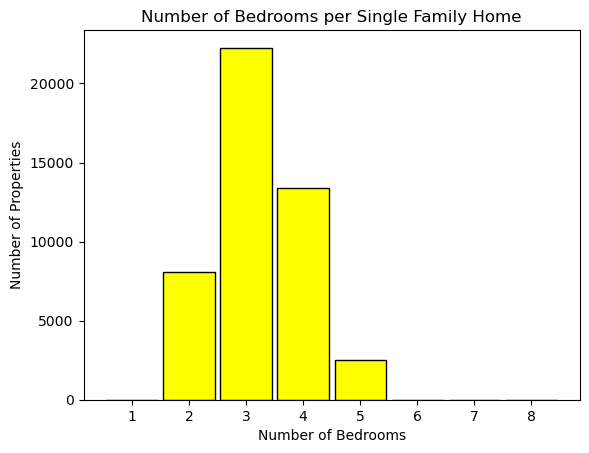


The mean number of bedrooms is 3.22
The median number of bedrooms is 3.0
The mode number of bedrooms is 3
The feature bedrooms has a relatively normal distribution
____________________________________________________________
____________________________________________________________


In [4]:
# Number of Bedrooms

plt.hist(x='bedrooms', data=zillow, bins=range(1,10), 
         rwidth=.9, color='yellow', ec='black', align='left')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Number of Properties')
plt.title('Number of Bedrooms per Single Family Home')
plt.show()
print(f'\nThe mean number of bedrooms is {zillow.bedrooms.mean():.2f}')
print(f'The median number of bedrooms is {zillow.bedrooms.median()}')
print(f'The mode number of bedrooms is {zillow.bedrooms.mode()[0]}')
print('The feature bedrooms has a relatively normal distribution')
print('____________________________________________________________')
print('____________________________________________________________')

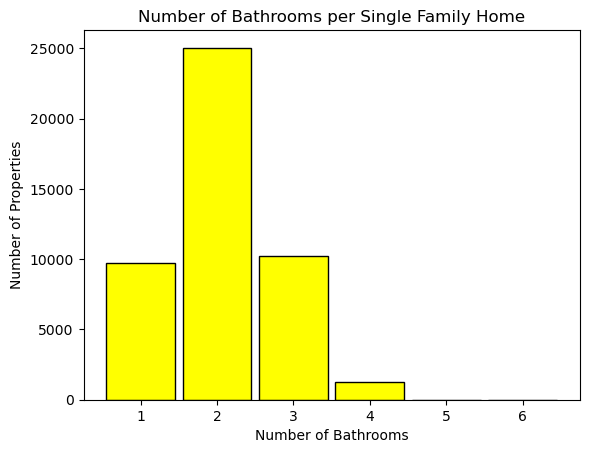


The mean number of bathrooms is 2.12
The median number of bathrooms is 2.0
The mode number of bathrooms is 2.0
The feature bathrooms has a relatively normal distribution
____________________________________________________________
____________________________________________________________


In [5]:
# Number of Bathrooms

plt.hist(x='bathrooms', data=zillow, bins=range(1,8), 
         rwidth=.9, color='yellow', ec='black', align='left')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Number of Properties')
plt.title('Number of Bathrooms per Single Family Home')
plt.show()
print(f'\nThe mean number of bathrooms is {zillow.bathrooms.mean():.2f}')
print(f'The median number of bathrooms is {zillow.bathrooms.median():.1f}')
print(f'The mode number of bathrooms is {zillow.bathrooms.mode()[0]:.1f}')
print('The feature bathrooms has a relatively normal distribution')
print('____________________________________________________________')
print('____________________________________________________________')

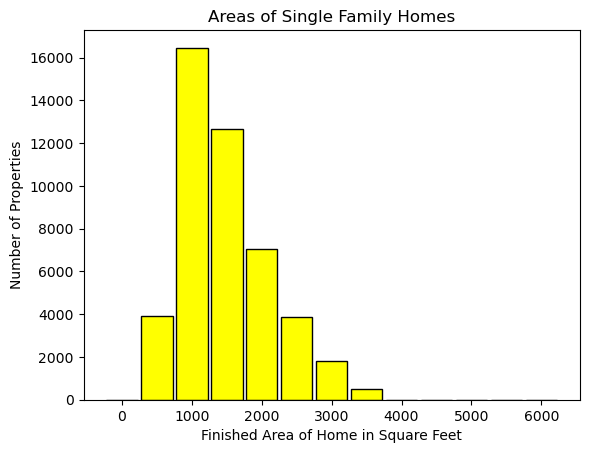


The mean square footage is 1725
The median square footage is 1585
The mode square footage is 1120
The feature area has a relatively normal distribution with right skew
____________________________________________________________
____________________________________________________________


In [6]:
# Area of home in finished square feet

plt.hist(x='area', data=zillow, bins=range(0,7000,500), 
         rwidth=.9, color='yellow', ec='black', align='left')
plt.xlabel('Finished Area of Home in Square Feet')
plt.ylabel('Number of Properties')
plt.title('Areas of Single Family Homes')
plt.show()
print(f'\nThe mean square footage is {zillow.area.mean():.0f}')
print(f'The median square footage is {zillow.area.median():.0f}')
print(f'The mode square footage is {zillow.area.mode()[0]:.0f}')
print('The feature area has a relatively normal distribution with right skew')
print('____________________________________________________________')
print('____________________________________________________________')

- The Tax Values of the properties seem very low to me for the counties and years under consideration. I will add this to the things to look into in the future.

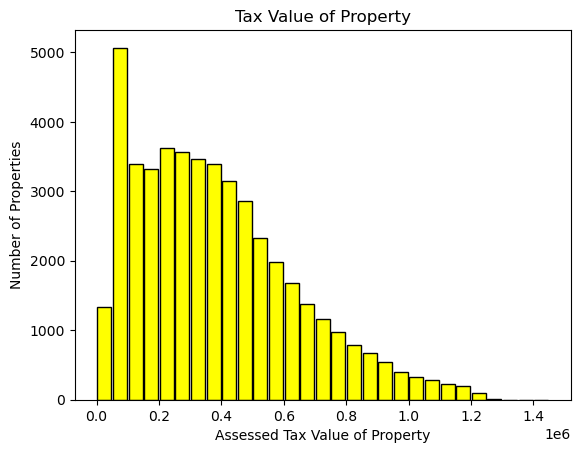


The mean assessed tax value is $381,588
The median assessed tax value is $340,899
The mode assessed tax value is $455,000
The feature tax value has a right-skewed distribution with a
    strong peak in the 50-100k bucket.
____________________________________________________________
____________________________________________________________


In [7]:
# Assessed Tax Value of Home

plt.hist(x='tax_value', data=zillow, bins=range(0,1_500_000, 50_000), 
         rwidth=.9, color='yellow', ec='black', align='mid')
plt.xlabel('Assessed Tax Value of Property')
plt.ylabel('Number of Properties')
plt.title('Tax Value of Property')
plt.show()
print(f'\nThe mean assessed tax value is ${zillow.tax_value.mean():,.0f}')
print(f'The median assessed tax value is ${zillow.tax_value.median():,.0f}')
print(f'The mode assessed tax value is ${zillow.tax_value.mode()[0]:,.0f}')
print('The feature tax value has a right-skewed distribution with a\n\
    strong peak in the 50-100k bucket.')
print('____________________________________________________________')
print('____________________________________________________________')

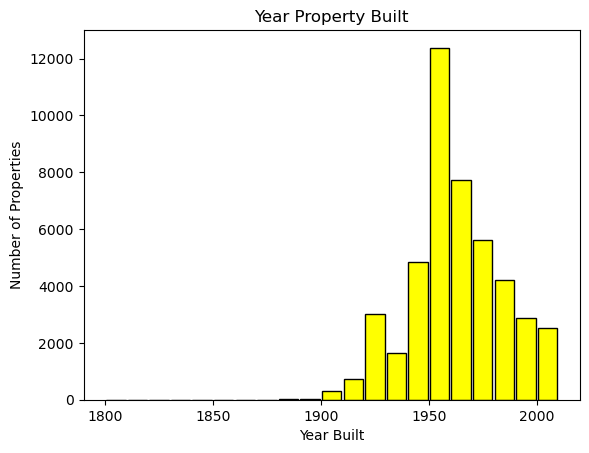


The mean year built is 1962
The median year built is 1960
The mode year built is 1955
The feature year built has a slightly left-skewed distribution with a
    strong peak in the 1950s bucket.
____________________________________________________________
____________________________________________________________


In [8]:
# Year home was built

plt.hist(x='year_built', data=zillow, bins=range(1800,2020,10), 
         rwidth=.9, color='yellow', ec='black', align='mid')
plt.xlabel('Year Built')
plt.ylabel('Number of Properties')
plt.title('Year Property Built')
plt.show()
print(f'\nThe mean year built is {zillow.year_built.mean():.0f}')
print(f'The median year built is {zillow.year_built.median():.0f}')
print(f'The mode year built is {zillow.year_built.mode()[0]:.0f}')
print('The feature year built has a slightly left-skewed distribution with a\n\
    strong peak in the 1950s bucket.')
print('____________________________________________________________')
print('____________________________________________________________')

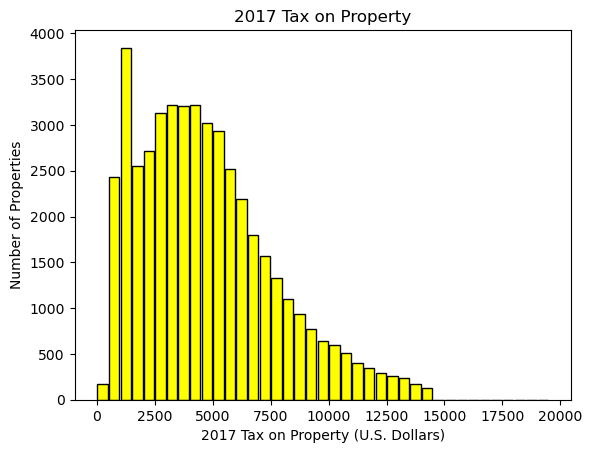


The mean tax is $4,728
The median tax is $4,280
The mode tax is $346
The feature tax amount has a right-skewed distribution with a
    strong peak in the $1500-$2000 bucket.
____________________________________________________________
____________________________________________________________


In [9]:
# Tax Amount of Home

plt.hist(x='tax_amount', data=zillow, bins=range(0,20_000,500), 
         rwidth=.9, color='yellow', ec='black', align='mid')
plt.xlabel('2017 Tax on Property (U.S. Dollars)')
plt.ylabel('Number of Properties')
plt.title('2017 Tax on Property')
plt.show()
print(f'\nThe mean tax is ${zillow.tax_amount.mean():,.0f}')
print(f'The median tax is ${zillow.tax_amount.median():,.0f}')
print(f'The mode tax is ${zillow.tax_amount.mode()[0]:,.0f}')
print('The feature tax amount has a right-skewed distribution with a\n\
    strong peak in the $1500-$2000 bucket.')
print('____________________________________________________________')
print('____________________________________________________________')

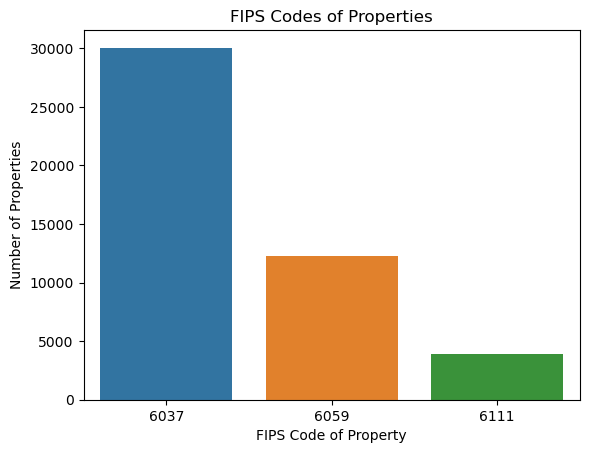

In [10]:
# Assessment of properties by FIPS

sns.countplot(x='fips', data=zillow)
plt.xlabel('FIPS Code of Property')
plt.ylabel('Number of Properties')
plt.title('FIPS Codes of Properties')
plt.show()

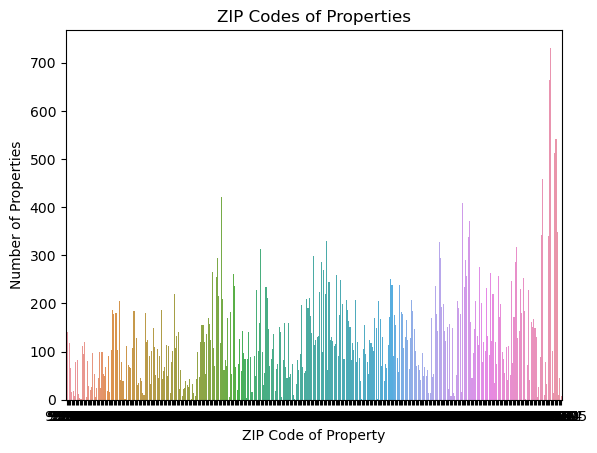

In [11]:
sns.countplot(x='zip', data=zillow)
plt.xlabel('ZIP Code of Property')
plt.ylabel('Number of Properties')
plt.title('ZIP Codes of Properties')
plt.show()

##### Can see there are large disparities in number of properties per ZIP code, ranging from near zero to over 700.

#### Univariate Summary:
**For single-family homes with a transaction in 2017:**

1. average home was built in 1962
2. had 3.22 bedrooms
3. had 2.12 bathrooms
4. was 1725 square feet
5. with a mean tax value of \$381,625
6. and a mean tax amount of \$4,729
7. The majority were in LA County, followed by Orange, then Ventura

- bedrooms, bathrooms, and year built are relatively normally distributed
- finished area is slightly right skewed
- tax value and tax are both right skewed with a strong peak near the lower boundary



### Splitting Dataset

In [12]:
train, val, test = w.wrangle_zillow()

In [13]:
train.shape, val.shape, test.shape

((25886, 9), (11094, 9), (9245, 9))

### Bivariate Analysis

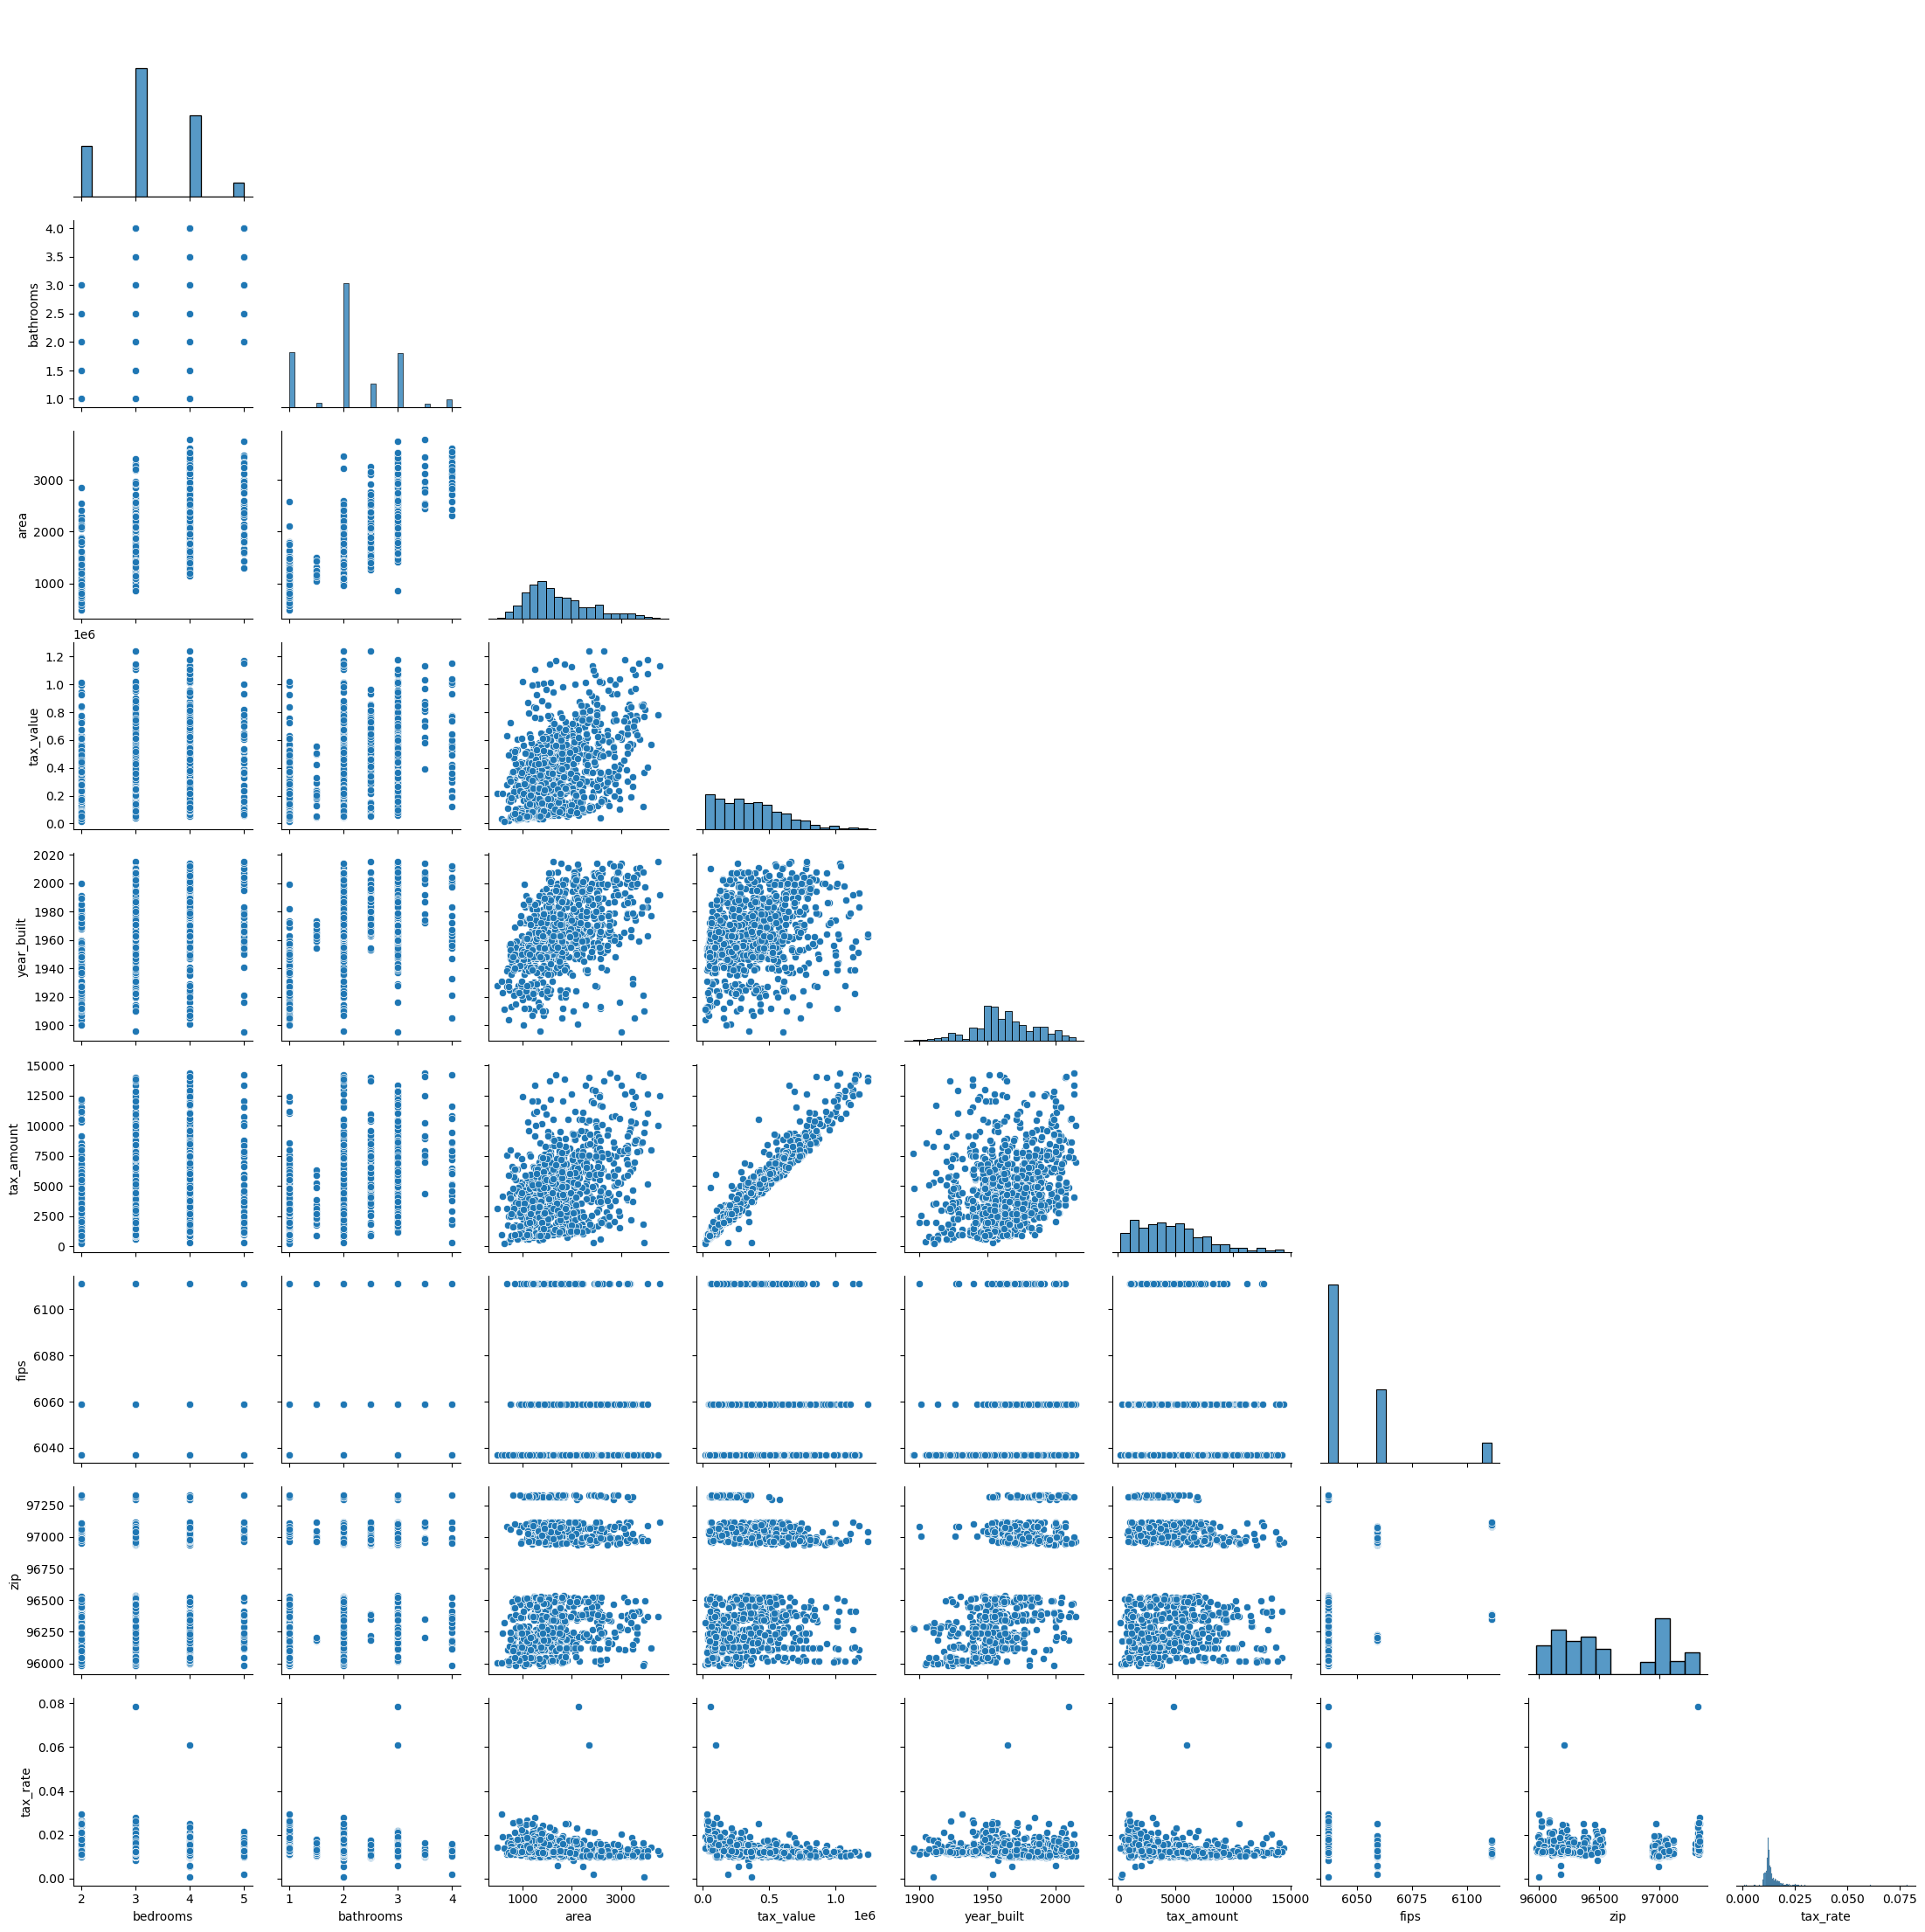

In [14]:
sns.pairplot(train.sample(1000), corner=True)
plt.show()

#### Bivariate Questions:

1. Is there a correlation between the number of bathrooms and the tax value?
2. Is there a correlation between the number of bedrooms and the tax value?
3. Is there a correlation between the area of the house and the tax value?
4. Is there a correlation between FIPS and the tax value of the house?

#### 1. Test correlation between number of bathrooms and tax value

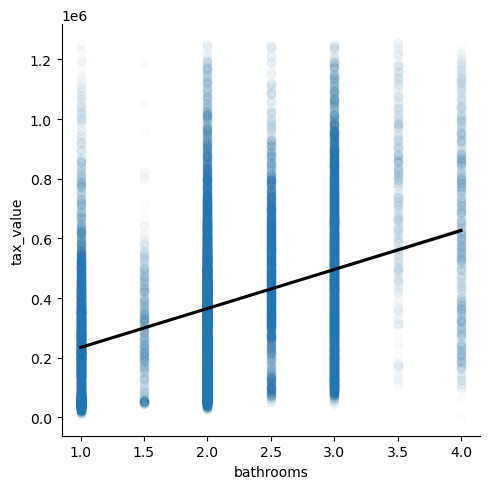

In [15]:
sns.lmplot(x='bathrooms', y='tax_value', data=train, 
           line_kws={'color': 'black'}, scatter_kws={'alpha': 0.02})
plt.show()

In [16]:
# visually it appears there is a correlation
# to confirm, statisically test a hypothesis
# use spearman test due to the ordinal nature
# bathrooms and the non_normality of tax_value.

$H_0:$ There is no linear correlation between bathrooms and tax value

$H_1:$ There is a linear correlation between bathrooms and tax value

In [17]:
# Let's set a 95% confidence level for statistical significance, so
α = 0.05

corr_bath, p_bath = stats.spearmanr(train.bathrooms, train.tax_value)

if p_bath < α:
    print(f'Correlation coefficient: {corr_bath}')
    print(f'p: {p_bath}')
    print('Reject the null hypothesis that there is no linear correlation between bathrooms and tax value')
else:
    print('We cannot reject the null hypothesis that there is no linear correlation between bathrooms and tax value')

Correlation coefficient: 0.3760637967825548
p: 0.0
Reject the null hypothesis that there is no linear correlation between bathrooms and tax value


#### 2. Test correlation between the number of bedrooms and the tax value?


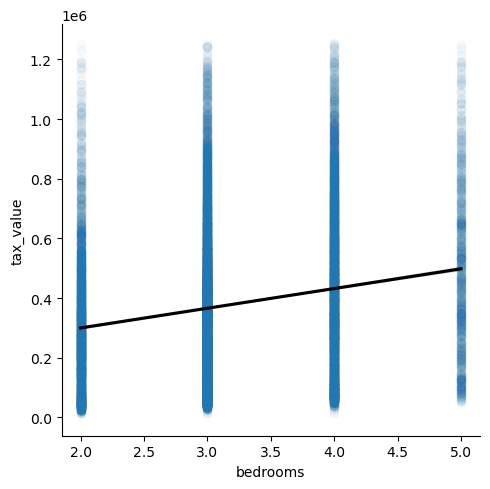

In [18]:
sns.lmplot(x='bedrooms', y='tax_value', data=train, 
           line_kws={'color': 'black'}, scatter_kws={'alpha': 0.02})
plt.show()

In [19]:
# visually it appears there is a correlation
# to confirm, statisically test a hypothesis
# use spearman test due to the ordinal nature
# bedrooms and the non_normality of tax_value.

$H_0:$ There is no linear correlation between bedrooms and tax value

$H_1:$ There is a linear correlation between bedrooms and tax value

In [20]:
# Let's set a 95% confidence level for statistical significance, so
α = 0.05

corr_bed, p_bed = stats.spearmanr(train.bedrooms, train.tax_value)

if p_bath < α:
    print(f'Correlation coefficient: {corr_bed}')
    print(f'p: {p_bath}')
    print('Reject the null hypothesis that there is no linear correlation between bedrooms and tax value')
else:
    print('We cannot reject the null hypothesis that there is no linear correlation between bedrooms and tax value')

Correlation coefficient: 0.20492793373714743
p: 0.0
Reject the null hypothesis that there is no linear correlation between bedrooms and tax value


#### 3. Is there a correlation between the area of the house and the tax value?


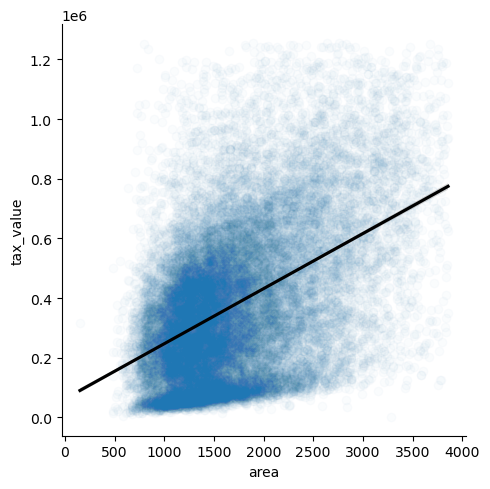

In [21]:
sns.lmplot(x='area', y='tax_value', data=train, 
           line_kws={'color': 'black'}, scatter_kws={'alpha': 0.02})
plt.show()

In [22]:
# visually it appears there is a correlation
# to confirm, statisically test a hypothesis
# use pearson r test as area is relatively normal.

$H_0:$ There is no linear correlation between bedrooms and tax value

$H_1:$ There is a linear correlation between bedrooms and tax value

In [23]:
# Let's set a 95% confidence level for statistical significance, so
α = 0.05

corr_area, p_area = stats.pearsonr(train.area, train.tax_value)

if p_bath < α:
    print(f'Correlation coefficient: {corr_area}')
    print(f'p: {p_area}')
    print('Reject the null hypothesis that there is no linear correlation between area and tax value')
else:
    print('We cannot reject the null hypothesis that there is no linear correlation between area and tax value')

Correlation coefficient: 0.4611238772590686
p: 0.0
Reject the null hypothesis that there is no linear correlation between area and tax value


#### 4. Is there a correlation between FIPS and the tax value of the house?

Text(0.5, 1.0, 'Mean Tax Value by FIPS')

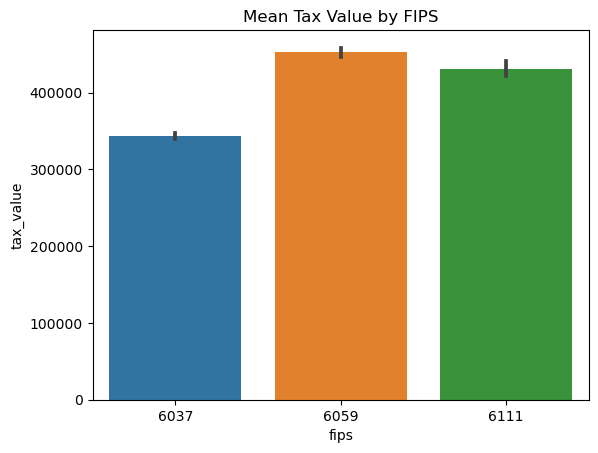

In [24]:
sns.barplot(x='fips', y='tax_value', data=train)
plt.show
plt.title('Mean Tax Value by FIPS')

In [25]:
# It appears there is a correlation between fips and tax_value
# best to do this pairwise for statistical testing
# start with 6037 v 6059, then 6059 v 6111, then 6037 v 6111

In [26]:
train.fips.value_counts()

6037    16794
6059     6878
6111     2214
Name: fips, dtype: int64

In [ ]:
unique_fips = train.fips.unique().tolist()
unique_fips

[6037, 6111, 6059]

In [77]:
fip_6037 = train[train.fips == 6037]
fip_6059 = train[train.fips == 6059]
fip_6111 = train[train.fips == 6111]

fips_dict = {'LA County 6037 v Orange County 6059': stats.ttest_ind(fip_6037.tax_value, fip_6059.tax_value)}
fips_dict['LA County 6037 v Ventura County 6111'] = stats.ttest_ind(fip_6037.tax_value, fip_6111.tax_value)
fips_dict['Orange County 6059 v Ventura County 6111'] = stats.ttest_ind(fip_6059.tax_value, fip_6111.tax_value)

fips_dict = pd.DataFrame(fips_dict, index=['t_stat', 'p_value'])
fips_dict = fips_dict.T
fips_dict['reject_null?'] = fips_dict.p_value < α
fips_dict
# print(f't-stat: {t_stat}')
# print(f'p: {p}')
# if p < α:
#     print(f'Reject the null hypothesis that there is no linear \
#     correlation between {combo[0]} and tax value')
# else:
#     print('We cannot reject the null hypothesis that there is no linear \
#     correlation between area and tax value')

,t_stat,p_value,reject_null?
LA County 6037 v Orange County 6059,-30.190350,1.678572e-196,True
LA County 6037 v Ventura County 6111,-15.874388,2.196350e-56,True
Orange County 6059 v Ventura County 6111,3.333988,8.595277e-04,True


#### Bivariate Summary:

1. There is a high degree of confidence that there is a linear relationship between:
    a. number of bathrooms and tax value
    b. number of bedrooms and tax value
    c. finished square feet of area and tax value
2. There is a high degree of confidence that there is a corellation between fips code and tax value for all three fips in the dataset.

### Preprocessing

1. Drop columns not needed for modeling
2. Scale features